### Egham

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)


tas_array = np.array(data['tas'])

temp =  tas_array[~np.isnan(tas_array)]

x_array = np.array(data['projection_x_coordinate'])
y_array = np.array(data['projection_y_coordinate'])

time = np.linspace(1884,2023, 1668)
print(len(time), len(temp))

print(x_array, y_array)

1668 726962
[-187500. -162500. -137500. -112500.  -87500.  -62500.  -37500.  -12500.
   12500.   37500.   62500.   87500.  112500.  137500.  162500.  187500.
  212500.  237500.  262500.  287500.  312500.  337500.  362500.  387500.
  412500.  437500.  462500.  487500.  512500.  537500.  562500.  587500.
  612500.  637500.  662500.  687500.  712500.  737500.  762500.] [ -87500.  -62500.  -37500.  -12500.   12500.   37500.   62500.   87500.
  112500.  137500.  162500.  187500.  212500.  237500.  262500.  287500.
  312500.  337500.  362500.  387500.  412500.  437500.  462500.  487500.
  512500.  537500.  562500.  587500.  612500.  637500.  662500.  687500.
  712500.  737500.  762500.  787500.  812500.  837500.  862500.  887500.
  912500.  937500.  962500.  987500. 1012500. 1037500. 1062500. 1087500.
 1112500. 1137500. 1162500. 1187500.]


Above code is the beginning of trying to plot average Egham tempertaure from 1884-2022. As far as I can tell the x and y values relate to Ordnance Survey grid codes. I believe Egham is within the square (487500,1625000) (487500,17500) (512500,187500) (512500,162500).

### England Annual

Data variables:
    tas        (time, region) float64 ...
    time_bnds  (time, bnds) datetime64[ns] ...


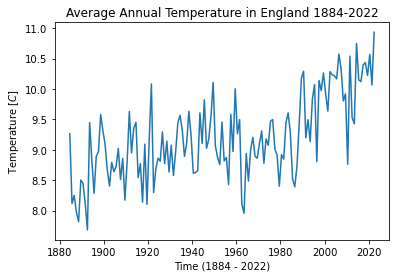

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


filename = r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England_Temp_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc"

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England_Temp_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
print(data.data_vars)

time_array = np.array(data['time'])
tas_array = np.array(data['tas'])





plt.plot(time_array, tas_array[:,1])
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature in England 1884-2022')
plt.rcParams.update({'font.size': 12})

Above is code and plot for annual mean temperature for England from the years 1884-2022.

### England Month vs Year

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England_Temp_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England_Temp_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tasy_array = np.array(year['tas'])
tasm_array = np.array(month['tas'])

print(tasm_array[:12,1])
print('The mean annual temperature in 1884 is',tasy_array[:1,1])

month_mean = np.mean(tasm_array[:12,1])
print('The mean temperature of the 12 months in 1884 is',month_mean)

print(tasm_array[108:120,1])
print('The mean annual temperature in 1894 is',tasy_array[9:10,1])

month_mean1 = np.mean(tasm_array[108:120,1])
print('The mean temperature of the 12 months in 1894 is',month_mean1)

[ 5.71331  4.76858  5.77995  6.50593 10.72382 13.39565 15.66486 16.55748
 14.05347  8.76672  5.09689  3.9224 ]
The mean annual temperature in 1884 is [9.26457]
The mean temperature of the 12 months in 1884 is 9.245754999999999
[ 1.61572  4.21199  6.92105  9.57802 12.23828 14.81246 15.76189 16.91706
 12.54878  9.5605   4.729    4.08416]
The mean annual temperature in 1894 is [9.44669]
The mean temperature of the 12 months in 1894 is 9.414909166666666


The above code demonstrates the difference between taking the yearly data from the Met Office and taking the monthly data and averaging it out yearly. 

### England Annual from Mean of Months

[ 9.245755    8.1069275   8.20977583  7.95049917  7.80226417  8.47111833
  8.42115417  8.09163083  7.6761      9.41490917  8.80517667  8.2294725
  8.87958667  8.954115    9.54688667  9.29541167  9.048055    8.62273833
  8.35928917  8.7787425   8.62008583  8.70069167  8.98438917  8.47431583
  8.845855    8.136045    8.77297333  9.5924475   8.93482083  9.3287025
  9.44037083  8.51257     8.75024     8.10114083  9.066905    8.06043333
  9.14571083 10.03699     8.26945167  8.65253083  8.84190083  8.78207833
  9.28379583  8.73904     9.13244667  8.58074833  9.03725333  8.55135167
  8.94669417  9.41408583  9.52836333  9.30007833  8.86619333  9.09213667
  9.60663583  9.21342917  8.60246583  8.59507833  8.60572583  9.58472417
  9.08302     9.809435    9.01685833  9.10434417  9.52386333 10.08368667
  9.04657333  8.84790583  8.73090333  9.4226575   8.77316917  8.82817167
  8.39171667  9.55212333  8.947785    9.9679175   9.24918     9.48815667
  8.08618917  7.91054     8.9318725   8.44939083  8.9

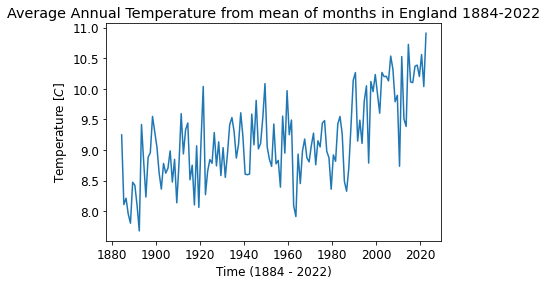

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

year = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England_Temp_Data\tas_hadukgrid_uk_country_ann_188401-202212.nc")
month = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England_Temp_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tasm_array = np.array(month['tas'])
time_array = np.array(year['time'])


temp = block_reduce(tasm_array, block_size=(12,1), func=np.mean, cval=np.mean(tasm_array))
print(temp[:,1])

plt.plot(time_array, temp[:,1])
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature from mean of months in England 1884-2022')
plt.rcParams.update({'font.size': 12})

Above is code and plot for annual mean temperature for England from the years 1884-2022 where the annual mean is taken from the mean of the 12 monthly means each year.

### England Ground Frost

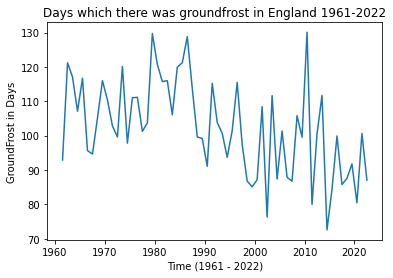

In [1]:

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\groundfrost_hadukgrid_uk_country_ann_196101-202212.nc")

frost_array = np.array(data['groundfrost'])
time_array = np.array(data['time'])

plt.plot(time_array, frost_array[:,1])
plt.xlabel('Time (1961 - 2022)')
plt.ylabel('GroundFrost in Days')
plt.title('Days which there was groundfrost in England 1961-2022')
plt.rcParams.update({'font.size': 12})

### England Humidity

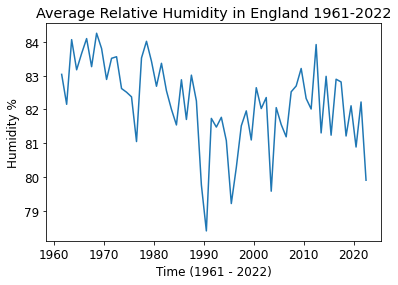

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\hurs_hadukgrid_uk_country_ann_196101-202212.nc")


hurs_array = np.array(data['hurs'])
time_array = np.array(data['time'])

plt.plot(time_array, hurs_array[:,1])
plt.xlabel('Time (1961 - 2022)')
plt.ylabel('Humidity %')
plt.title('Average Relative Humidity in England 1961-2022')
plt.rcParams.update({'font.size': 12})


### England Sea Level Pressure

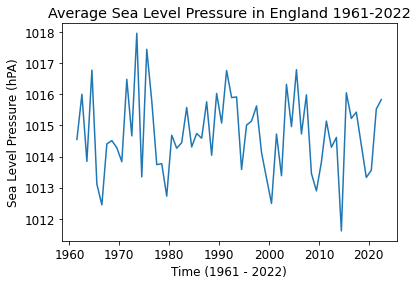

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\psl_hadukgrid_uk_country_ann_196101-202212.nc")


psl_array = np.array(data['psl'])
time_array = np.array(data['time'])

plt.plot(time_array, psl_array[:,1])
plt.xlabel('Time (1961 - 2022)')
plt.ylabel('Sea Level Pressure (hPA)')
plt.title('Average Sea Level Pressure in England 1961-2022')
plt.rcParams.update({'font.size': 12})

 ### England Water Vapour Pressure

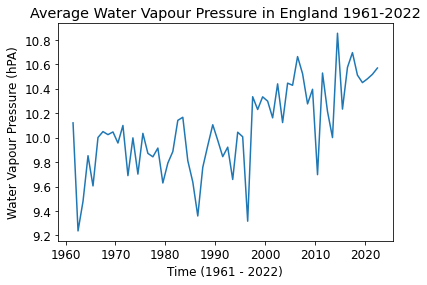

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\pv_hadukgrid_uk_country_ann_196101-202212.nc")


pv_array = np.array(data['pv'])
time_array = np.array(data['time'])

plt.plot(time_array, pv_array[:,1])
plt.xlabel('Time (1961 - 2022)')
plt.ylabel('Water Vapour Pressure (hPA)')
plt.title('Average Water Vapour Pressure in England 1961-2022')
plt.rcParams.update({'font.size': 12})

### England Rainfall

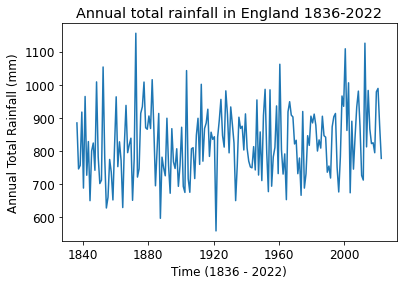

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\rainfall_hadukgrid_uk_country_ann_183601-202212.nc")


rain_array = np.array(data['rainfall'])
time_array = np.array(data['time'])

plt.plot(time_array, rain_array[:,1])
plt.xlabel('Time (1836 - 2022)')
plt.ylabel('Annual Total Rainfall (mm)')
plt.title('Annual total rainfall in England 1836-2022')
plt.rcParams.update({'font.size': 12})

### England Wind Speed

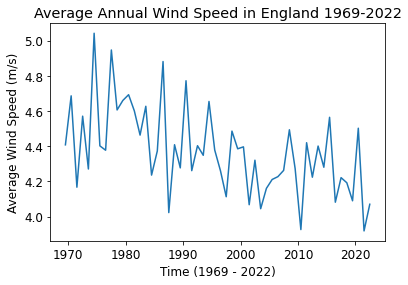

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\sfcWind_hadukgrid_uk_country_ann_196901-202212 (1).nc")


wind_array = np.array(data['sfcWind'])
time_array = np.array(data['time'])

plt.plot(time_array, wind_array[:,1])
plt.xlabel('Time (1969 - 2022)')
plt.ylabel('Average Wind Speed (m/s)')
plt.title('Average Annual Wind Speed in England 1969-2022')
plt.rcParams.update({'font.size': 12})

### England Snow Lying

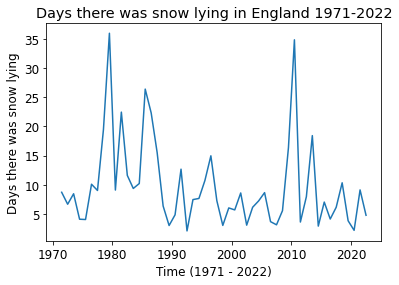

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\snowLying_hadukgrid_uk_country_ann_197101-202212.nc")

snow_array = np.array(data['snowLying'])
time_array = np.array(data['time'])

plt.plot(time_array, snow_array[:,1])
plt.xlabel('Time (1971 - 2022)')
plt.ylabel('Days there was snow lying')
plt.title('Days there was snow lying in England 1971-2022')
plt.rcParams.update({'font.size': 12})

### England Maximum Temperature

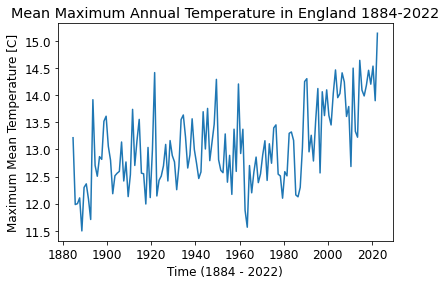

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tasmax_hadukgrid_uk_country_ann_188401-202212.nc")

tmax_array = np.array(data['tasmax'])
time_array = np.array(data['time'])

plt.plot(time_array, tmax_array[:,1])
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Maximum Mean Temperature [C]')
plt.title('Mean Maximum Annual Temperature in England 1884-2022')
plt.rcParams.update({'font.size': 12})

### England Minimum Temperature

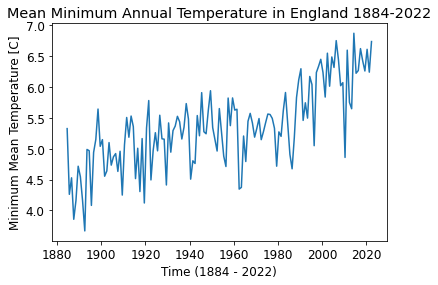

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tasmin_hadukgrid_uk_country_ann_188401-202212.nc")

tmin_array = np.array(data['tasmin'])
time_array = np.array(data['time'])

plt.plot(time_array, tmin_array[:,1])
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Minimum Mean Temperature [C]')
plt.title('Mean Minimum Annual Temperature in England 1884-2022')
plt.rcParams.update({'font.size': 12})

### Engalnd Annual from Mean Season

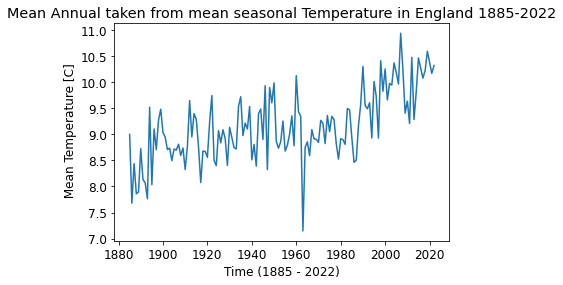

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_seas_188401-202212.nc")

tas_array = np.array(data['tas'])
time_array = np.array(data['calendar_year'])


temp = block_reduce(tas_array, block_size=(4,1), func=np.mean, cval=np.mean(tas_array))
temp =  temp[~np.isnan(temp[:,1])]

time = block_reduce(time_array[3:], block_size=(4), func=np.mean, cval=np.mean(time_array[3:]))



plt.plot(time, temp[:,1])
plt.xlabel('Time (1885 - 2022)')
plt.ylabel(' Mean Temperature [C]')
plt.title('Mean Annual taken from mean seasonal Temperature in England 1885-2022')
plt.rcParams.update({'font.size': 12})

### Daily vs Annual Data

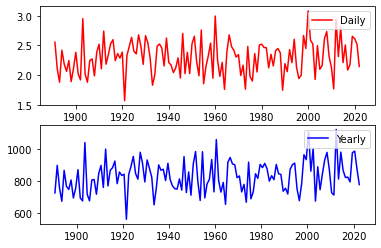

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

fig, axs = plt.subplots(2)

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\rainfall_hadukgrid_uk_country_day_18910101-20221231.nc")
data1 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\rainfall_hadukgrid_uk_country_ann_183601-202212.nc")

raind_array = np.array(data['rainfall'])
rainy_array = np.array(data1['rainfall'])

timed_array = np.array(data['time'])
timey_array = np.array(data1['time'])


rain = block_reduce(raind_array, block_size=(365,1), func=np.mean, cval=np.mean(raind_array))

time = np.linspace(1891,2023, 133)

axs[0].plot(time, rain[:,1], 'r', label = 'Daily')
axs[0].legend(loc='upper right')
axs[1].plot(timey_array[54:], rainy_array[54:,1], 'b', label = 'Yearly')
axs[1].legend(loc='upper right')

### Winter 1884

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_seas_188401-202212.nc")
data1 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\England\England_Data\tas_hadukgrid_uk_country_mon_188401-202212.nc")

tasm_array = np.array(data1['tas'])
tass_array = np.array(data['tas'])

print(tass_array[3,1])
print(np.mean(tasm_array[11:14,1]))

3.7838
3.8324266666666666
